In [58]:
specific = True

path = "clean_loop/no_mod"
if specific:
    # specific_paths = ["privacy/no_mod_10", "privacy/no_mod_25", "privacy/no_mod_50", "privacy/no_mod_80"]
    # specific_paths = ["privacy/drop_rows_10", "privacy/drop_rows_25", "privacy/drop_rows_50", "privacy/drop_rows_80"]
    specific_paths = ["personalization/no_mod_10", "personalization/no_mod_25", "personalization/no_mod_50", "personalization/no_mod_80"]
# save_path = "privacy/no_mod"
# save_path = "privacy/drop_rows"
save_path = "personalization/no_mod"

save = True

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import matplotlib.colors as mcolors
import re
import numpy as np
from matplotlib.ticker import PercentFormatter

In [60]:
base_df = pd.DataFrame()
files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]
for f in files:
    df = pd.read_csv(f"{path}/{f}")
    df["algorithm"] = f.split("_")[1]
    df["dataset"] = f.split("_")[0]
    base_df = pd.concat([base_df, df], ignore_index=True)
base_df

,key,value,algorithm,dataset
0,precision,0.000000,CBF,amazonsales
1,precision_at_k,0.025000,CBF,amazonsales
2,recall,0.000000,CBF,amazonsales
3,recall_at_k,0.025000,CBF,amazonsales
4,mae,1.441310,CBF,amazonsales
...,...,...,...,...
112,user_coverage,0.086957,RL,postrecommendations
113,item_coverage,0.002992,RL,postrecommendations
114,intra_list_similarity,0.118295,RL,postrecommendations
115,intra_list_dissimilarity,0.881705,RL,postrecommendations


In [61]:
specific_df = pd.DataFrame()

for specific_path in specific_paths:
    files = [f for f in os.listdir(specific_path) if os.path.isfile(os.path.join(specific_path, f))]
    for f in files:
        df = pd.read_csv(f"{specific_path}/{f}")
        df["algorithm"] = f.split("_")[1]
        df["dataset"] = f.split("_")[0]
        match = re.search(r'\d+', specific_path)
        if match:
            number = int(match.group())
            df["percent"] = number
        else:
            print("No number found in path")
        specific_df = pd.concat([specific_df, df], ignore_index=True)
specific_df

,key,value,algorithm,dataset,percent
0,precision,0.000000,CBF,amazonsales,10
1,precision_at_k,0.025000,CBF,amazonsales,10
2,recall,0.000000,CBF,amazonsales,10
3,recall_at_k,0.025000,CBF,amazonsales,10
4,mae,1.441310,CBF,amazonsales,10
...,...,...,...,...,...
463,user_coverage,0.032609,RL,postrecommendations,80
464,item_coverage,0.001122,RL,postrecommendations,80
465,intra_list_similarity,0.110475,RL,postrecommendations,80
466,intra_list_dissimilarity,0.889525,RL,postrecommendations,80


In [62]:
specific_df = specific_df.merge(
    base_df,
    on=['key', 'algorithm', 'dataset'],
    suffixes=('_ex', '_ref')
)


specific_df['delta'] = specific_df['value_ex'] - specific_df['value_ref']
specific_df

,key,value_ex,algorithm,dataset,percent,value_ref,delta
0,precision,0.000000,CBF,amazonsales,10,0.000000,0.000000
1,precision_at_k,0.025000,CBF,amazonsales,10,0.025000,0.000000
2,recall,0.000000,CBF,amazonsales,10,0.000000,0.000000
3,recall_at_k,0.025000,CBF,amazonsales,10,0.025000,0.000000
4,mae,1.441310,CBF,amazonsales,10,1.441310,0.000000
...,...,...,...,...,...,...,...
463,user_coverage,0.032609,RL,postrecommendations,80,0.086957,-0.054348
464,item_coverage,0.001122,RL,postrecommendations,80,0.002992,-0.001870
465,intra_list_similarity,0.110475,RL,postrecommendations,80,0.118295,-0.007820
466,intra_list_dissimilarity,0.889525,RL,postrecommendations,80,0.881705,0.007820


In [63]:
specific_df['percent_delta'] = specific_df['delta'] / specific_df['value_ref']
specific_df['percent_delta'] = specific_df['percent_delta'].replace([np.inf, -np.inf], 1)
specific_df['percent_delta'] = specific_df['percent_delta'].fillna(0)
# specific_df['percent_delta'] = specific_df['percent_delta'].apply(lambda x: f"{x:.2%}")
specific_df

,key,value_ex,algorithm,dataset,percent,value_ref,delta,percent_delta
0,precision,0.000000,CBF,amazonsales,10,0.000000,0.000000,0.000000
1,precision_at_k,0.025000,CBF,amazonsales,10,0.025000,0.000000,0.000000
2,recall,0.000000,CBF,amazonsales,10,0.000000,0.000000,0.000000
3,recall_at_k,0.025000,CBF,amazonsales,10,0.025000,0.000000,0.000000
4,mae,1.441310,CBF,amazonsales,10,1.441310,0.000000,0.000000
...,...,...,...,...,...,...,...,...
463,user_coverage,0.032609,RL,postrecommendations,80,0.086957,-0.054348,-0.625000
464,item_coverage,0.001122,RL,postrecommendations,80,0.002992,-0.001870,-0.625000
465,intra_list_similarity,0.110475,RL,postrecommendations,80,0.118295,-0.007820,-0.066102
466,intra_list_dissimilarity,0.889525,RL,postrecommendations,80,0.881705,0.007820,0.008869


In [64]:
specific_df.head(30)

,key,value_ex,algorithm,dataset,percent,value_ref,delta,percent_delta
0,precision,0.000000,CBF,amazonsales,10,0.000000,0.000,0.0
1,precision_at_k,0.025000,CBF,amazonsales,10,0.025000,0.000,0.0
2,recall,0.000000,CBF,amazonsales,10,0.000000,0.000,0.0
3,recall_at_k,0.025000,CBF,amazonsales,10,0.025000,0.000,0.0
4,mae,1.441310,CBF,amazonsales,10,1.441310,0.000,0.0
5,rmse,1.441310,CBF,amazonsales,10,1.441310,0.000,0.0
6,mrr,0.000000,CBF,amazonsales,10,0.000000,0.000,0.0
7,ndcg_at_k,0.000000,CBF,amazonsales,10,0.000000,0.000,0.0
8,user_coverage,0.000000,CBF,amazonsales,10,0.000000,0.000,0.0
9,item_coverage,0.000000,CBF,amazonsales,10,0.000000,0.000,0.0


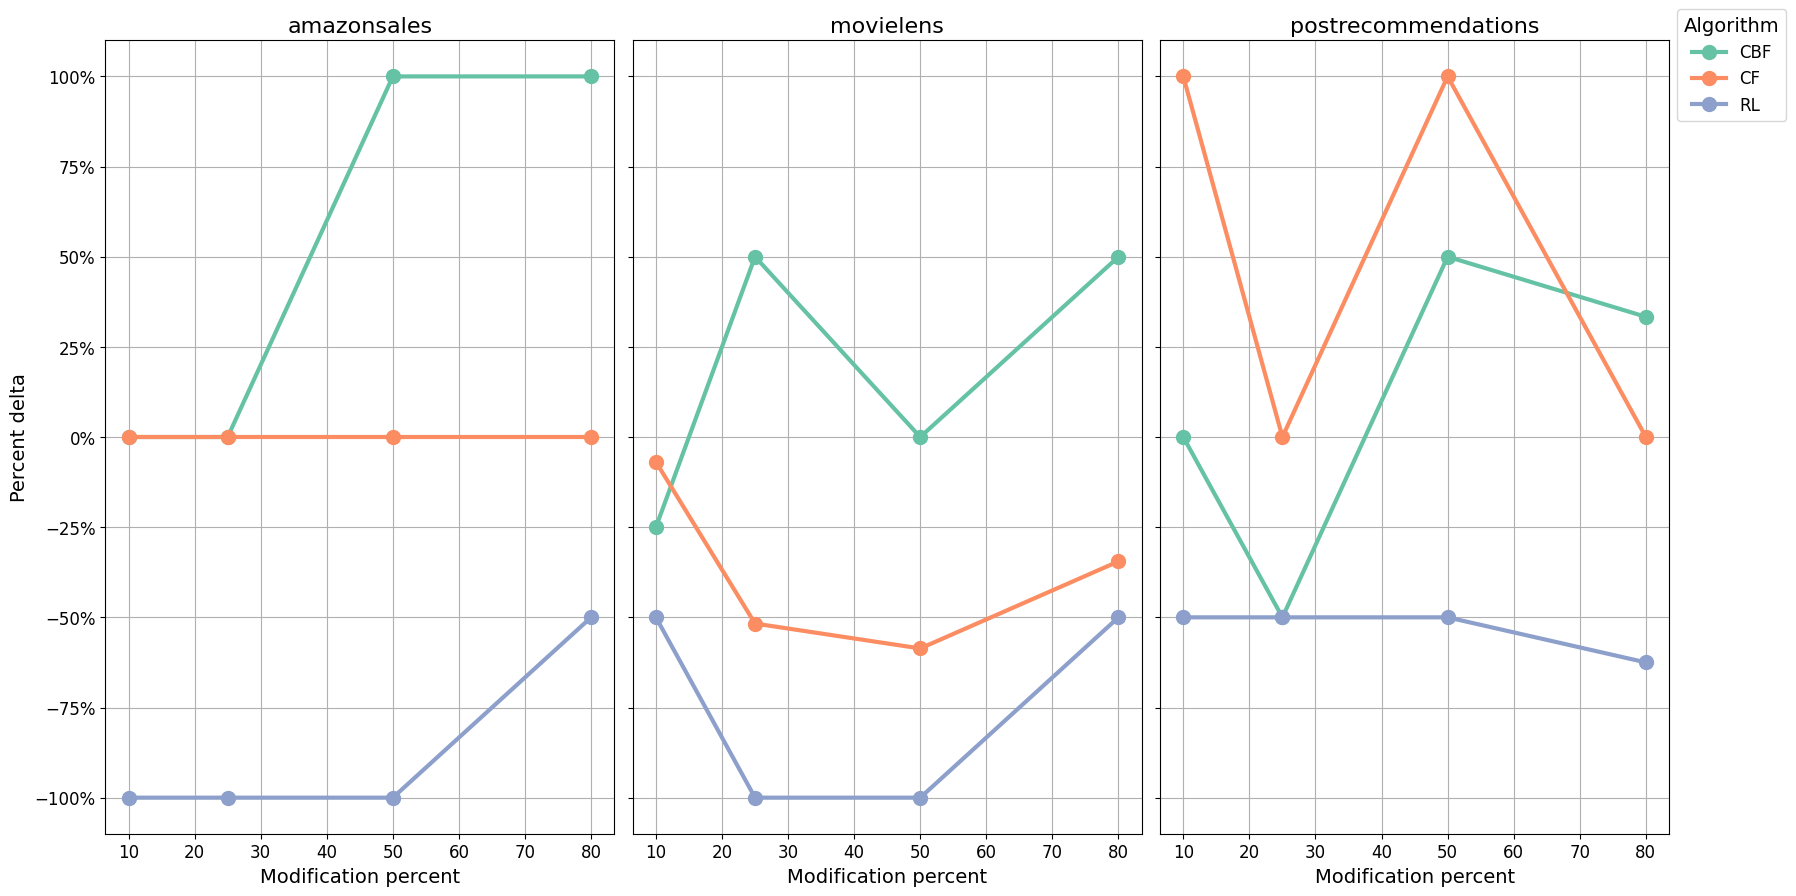

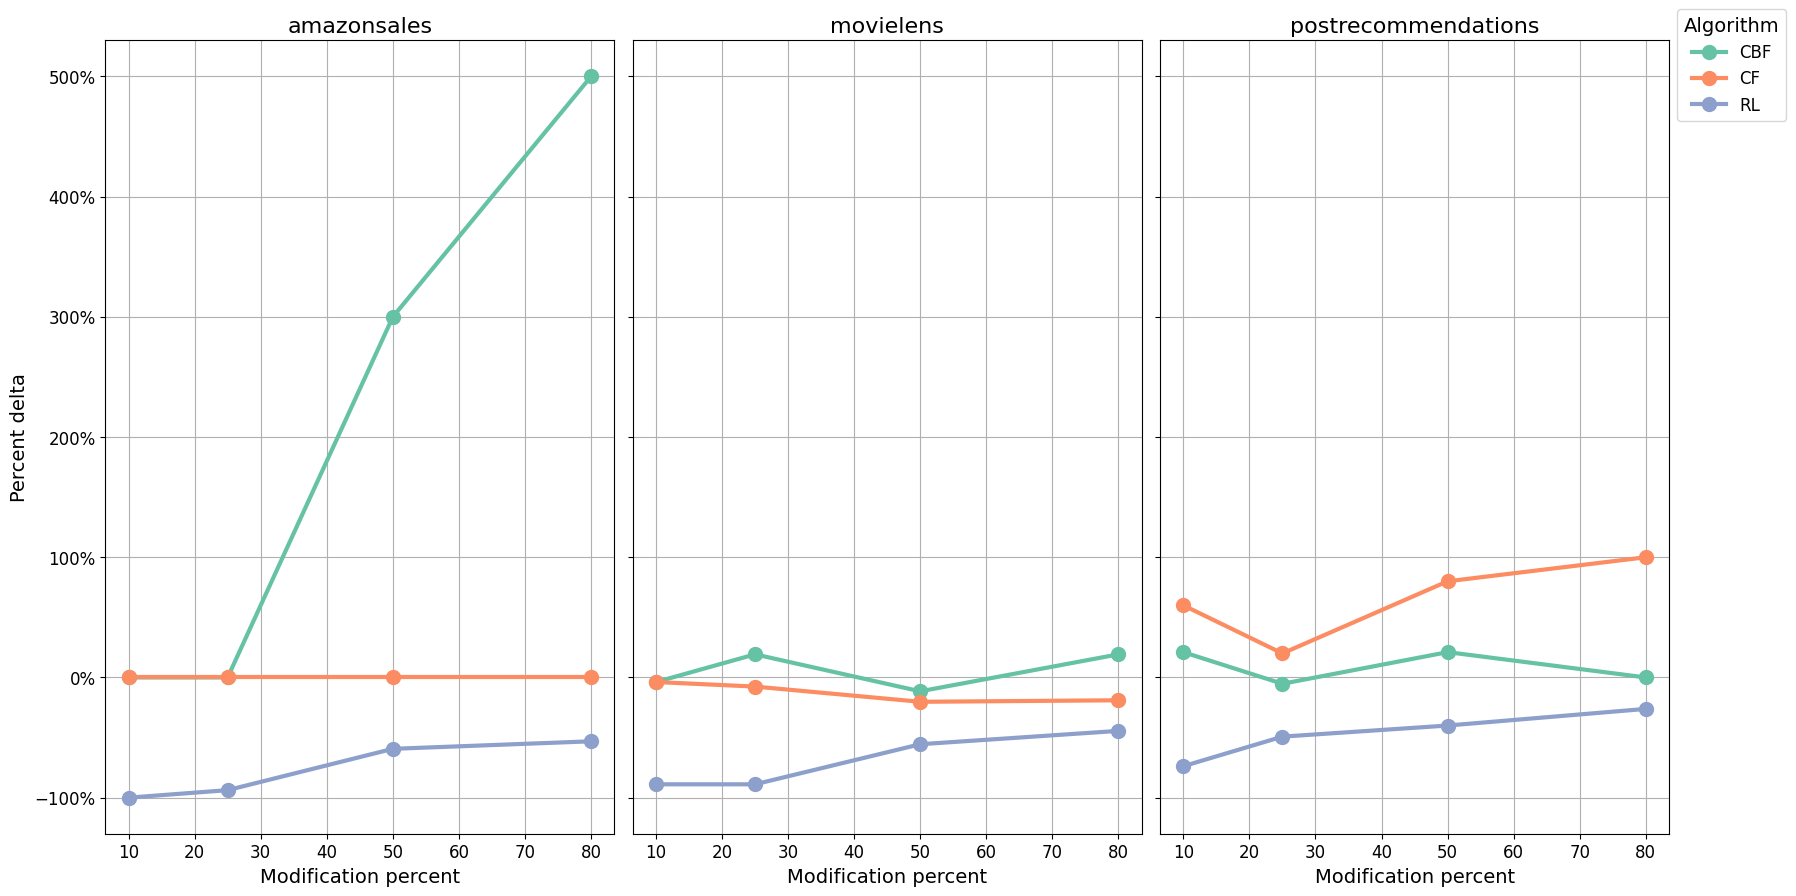

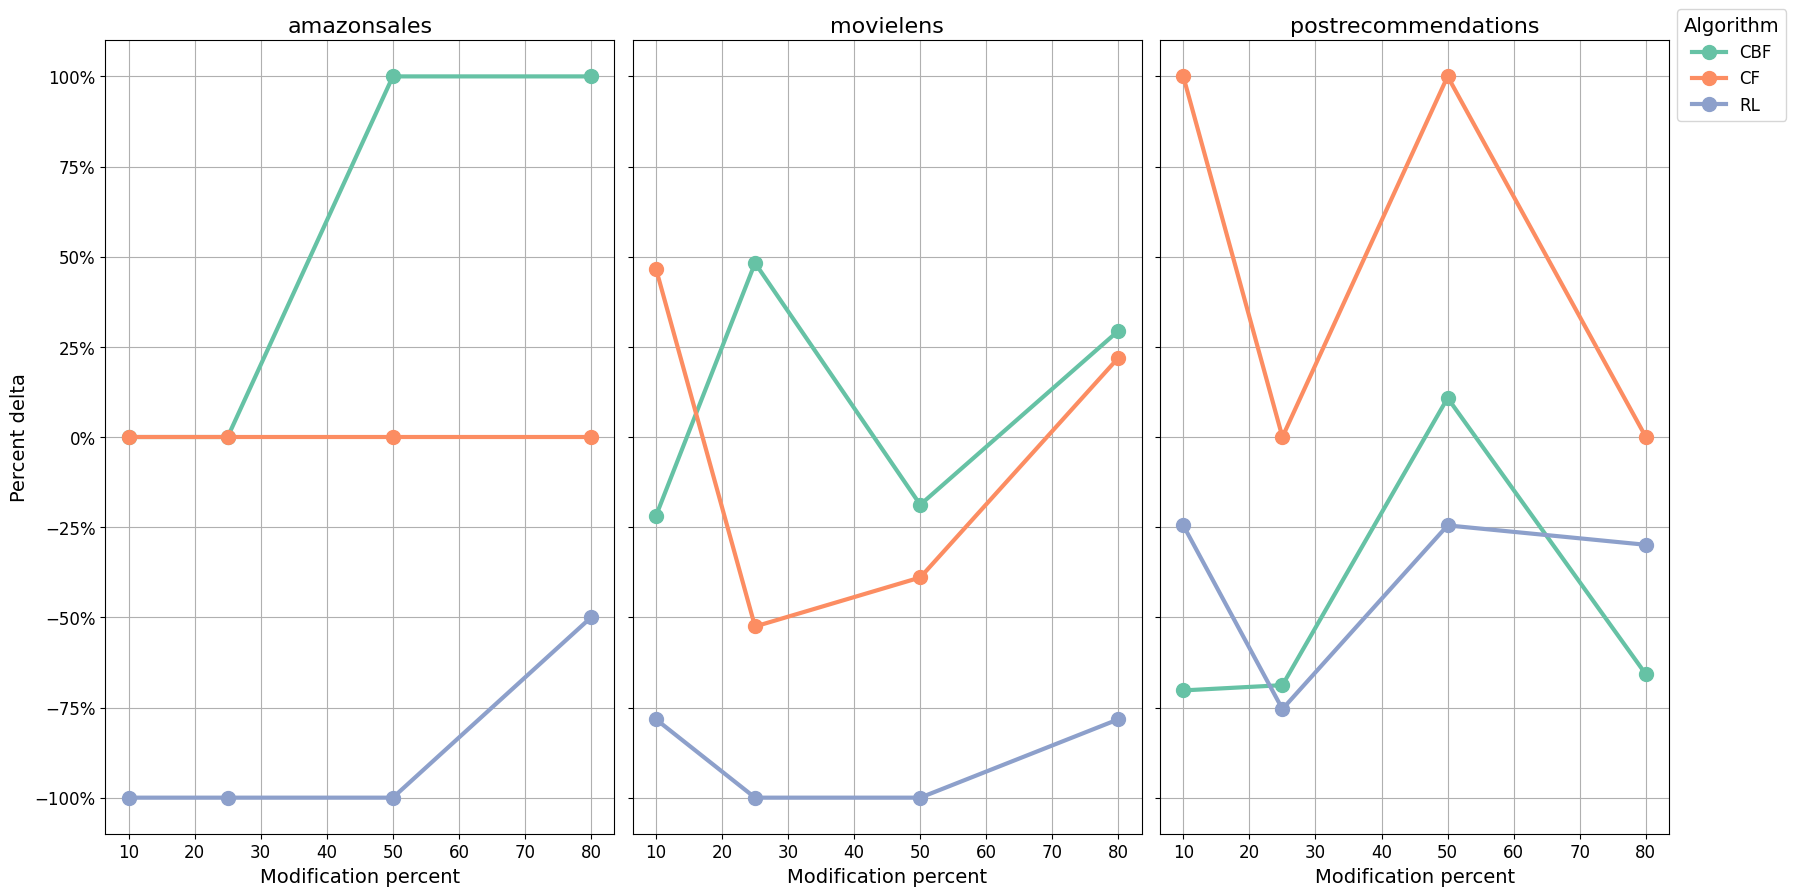

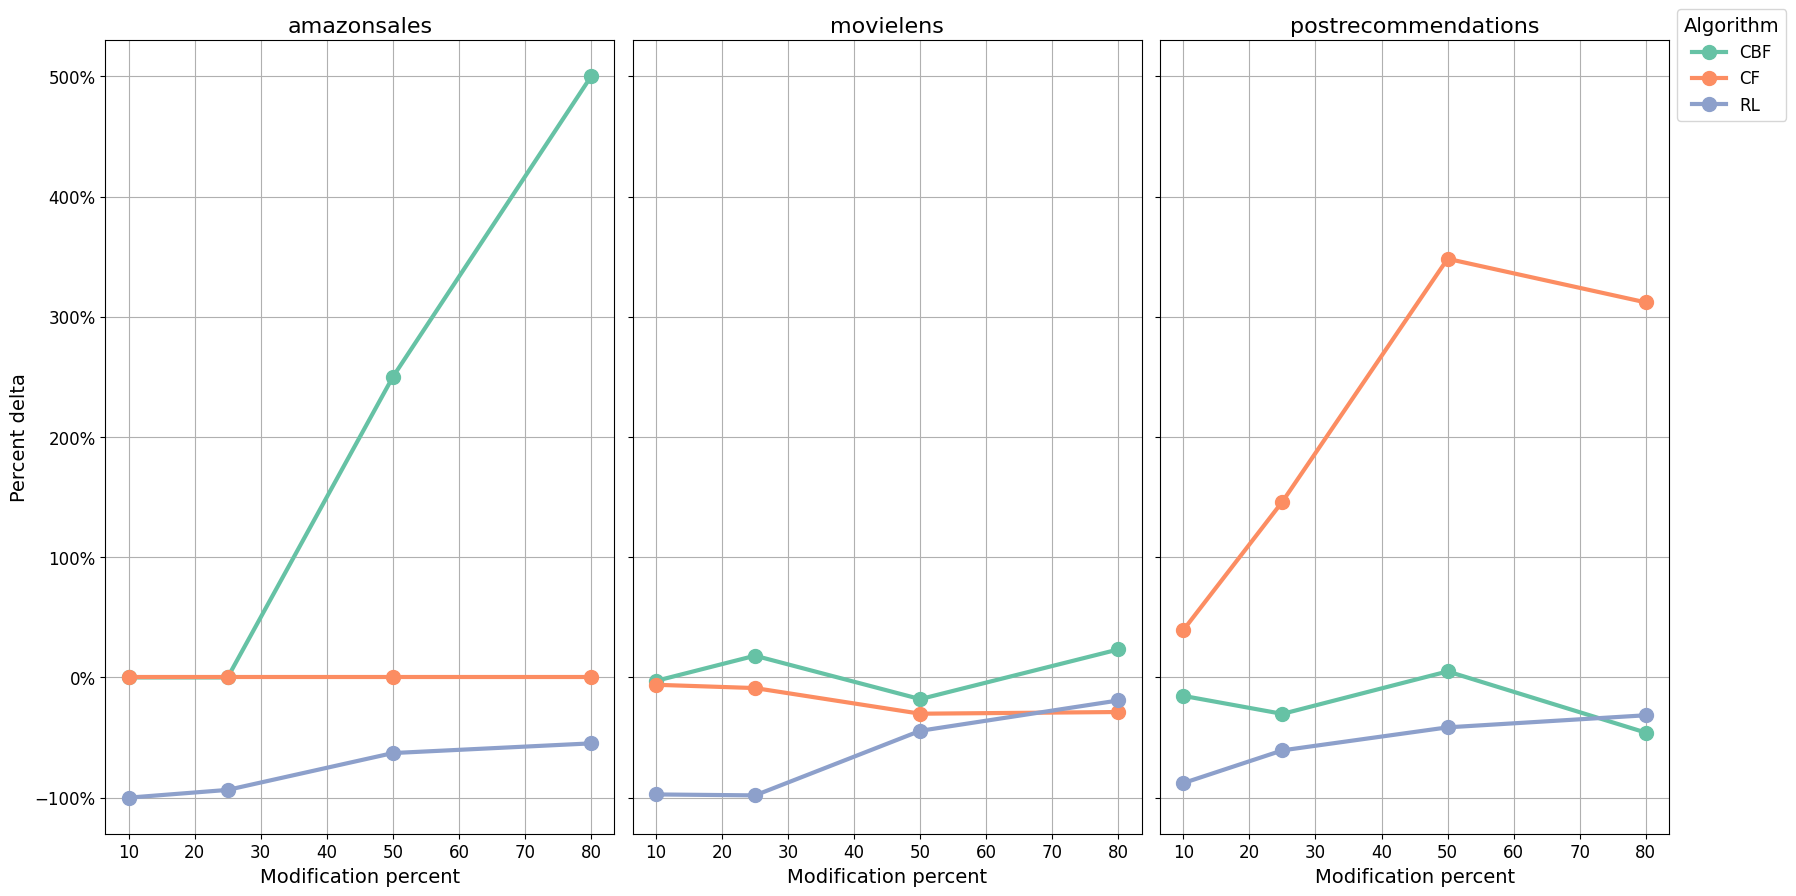

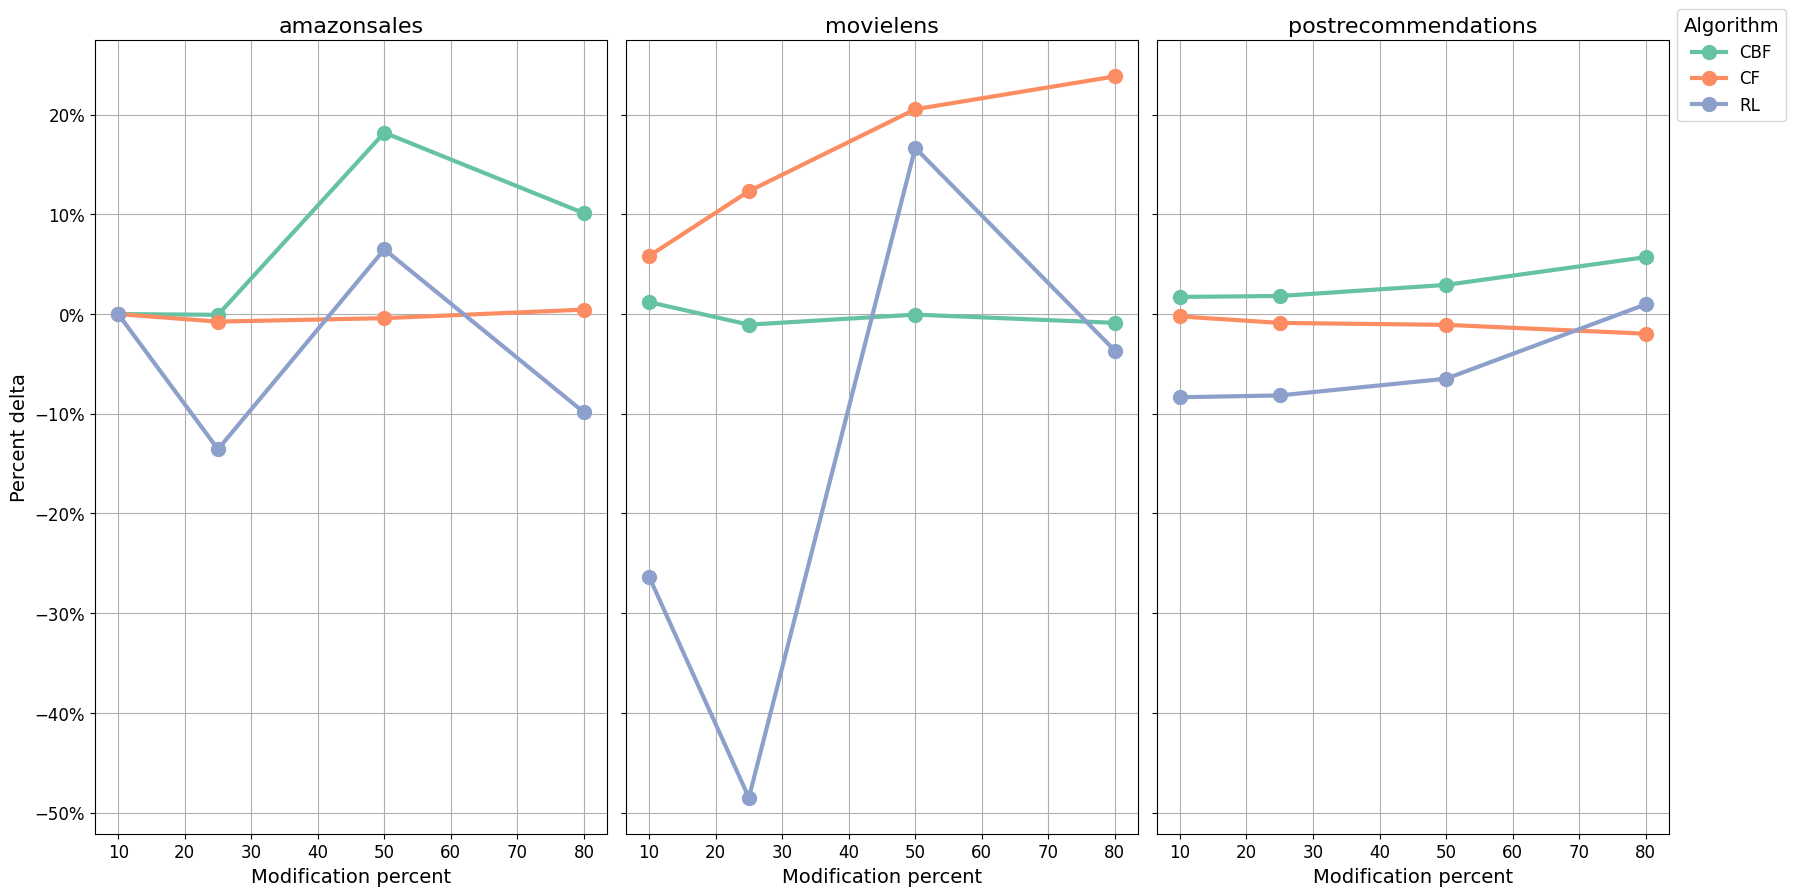

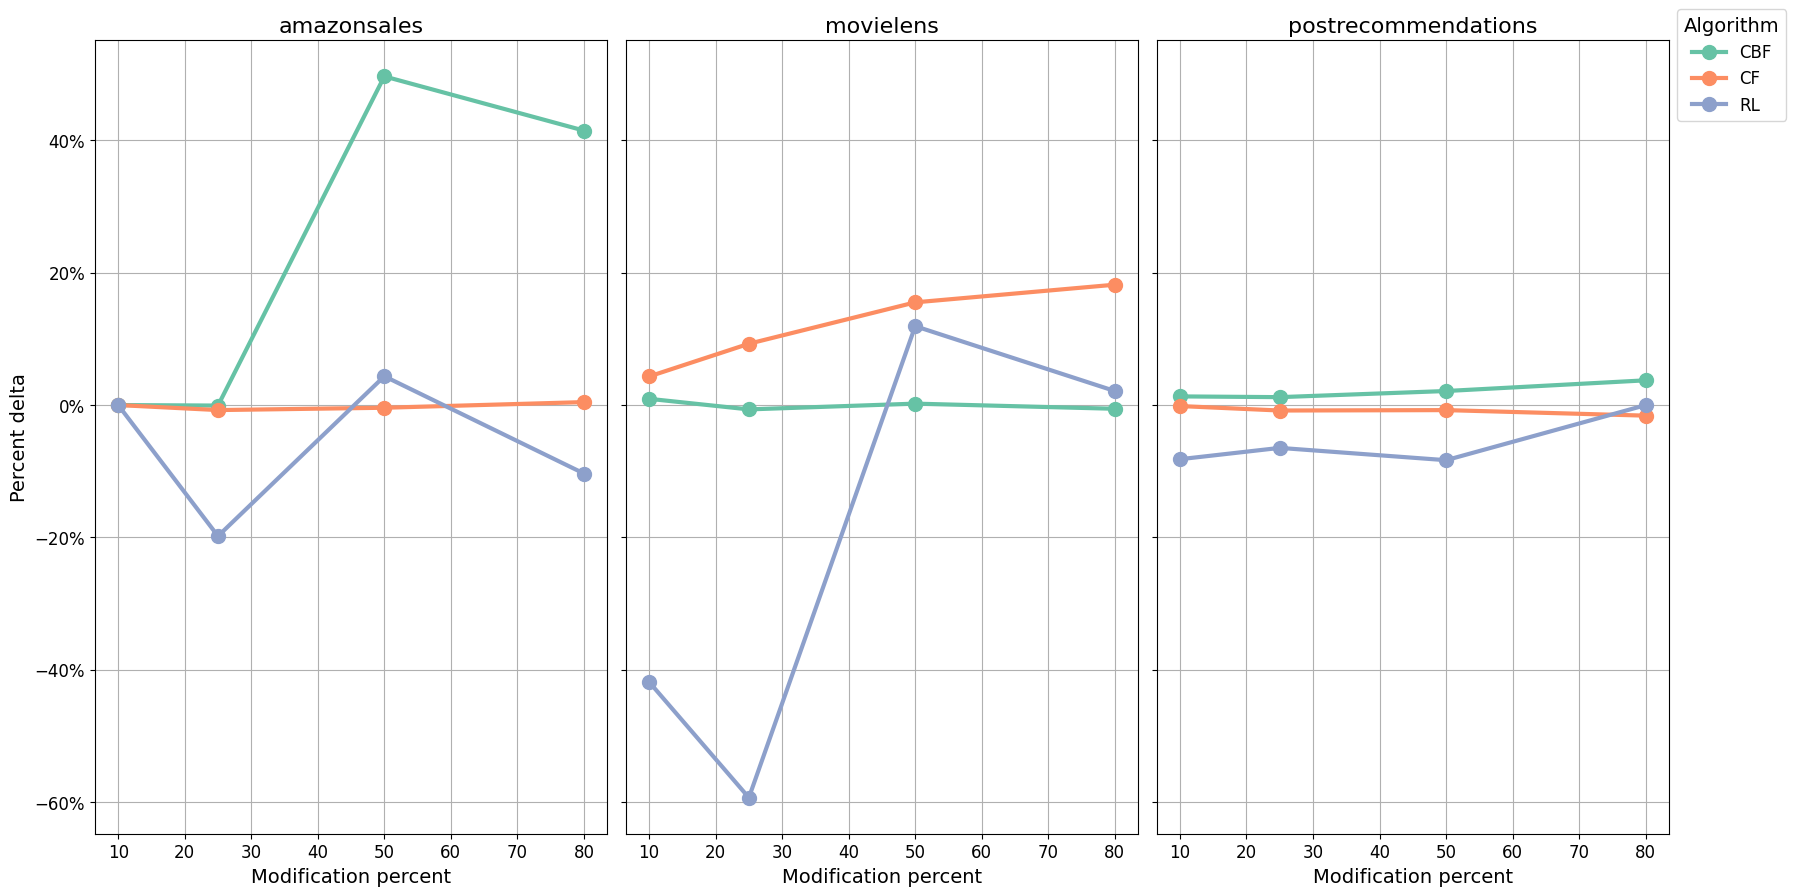

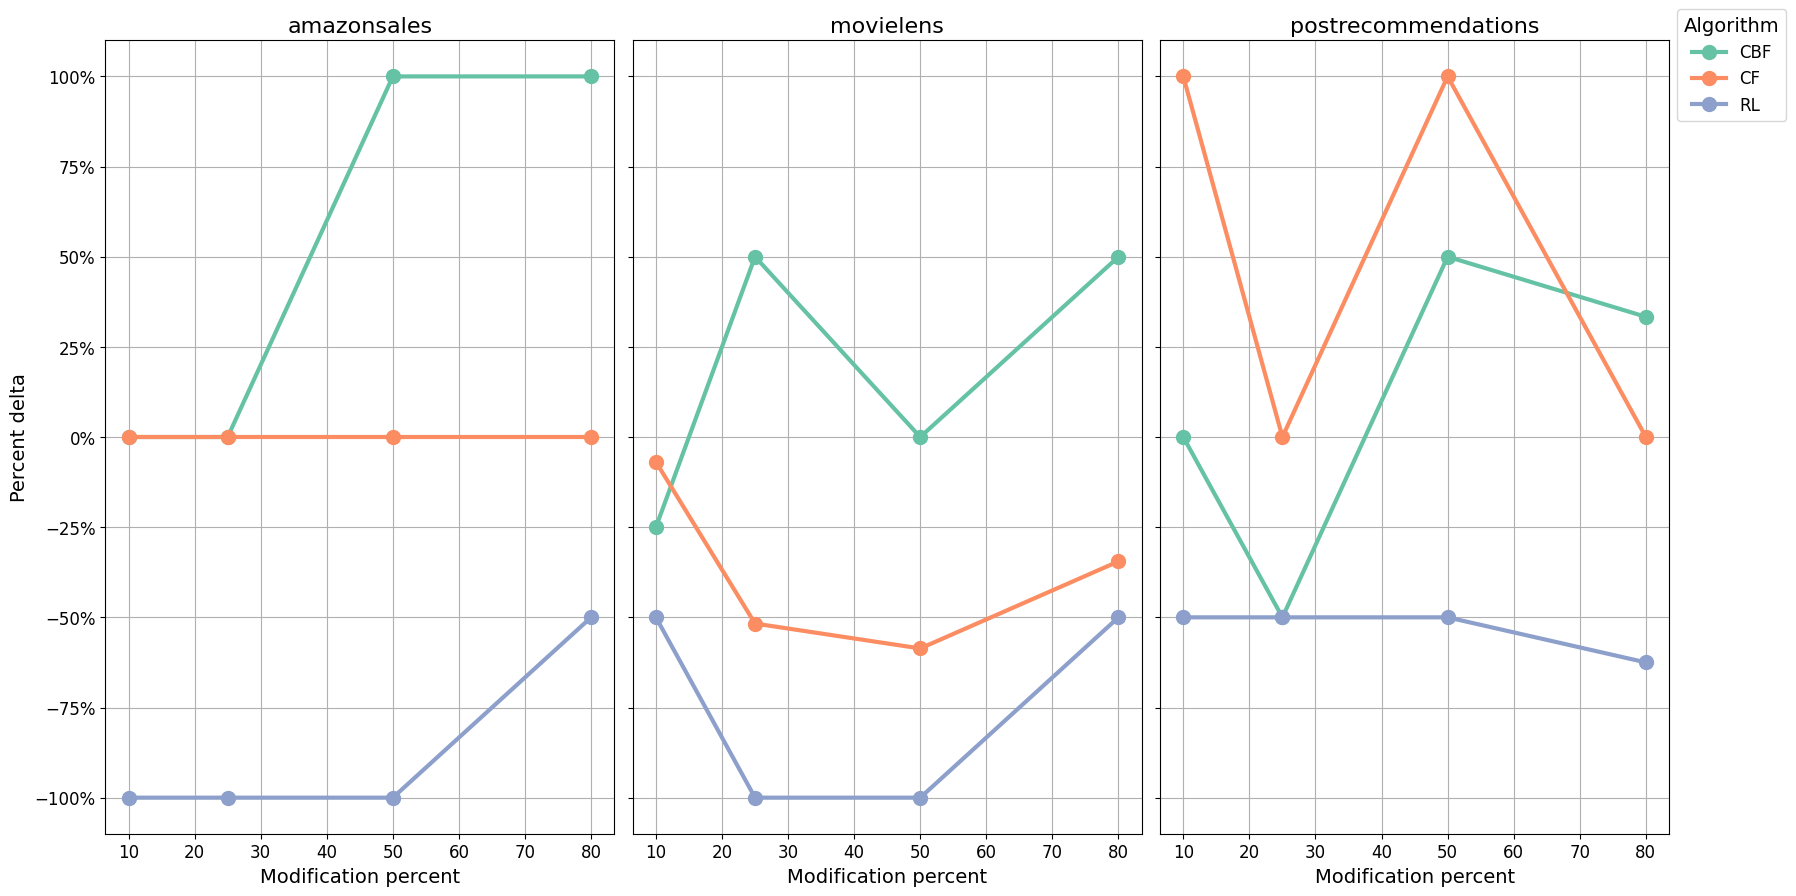

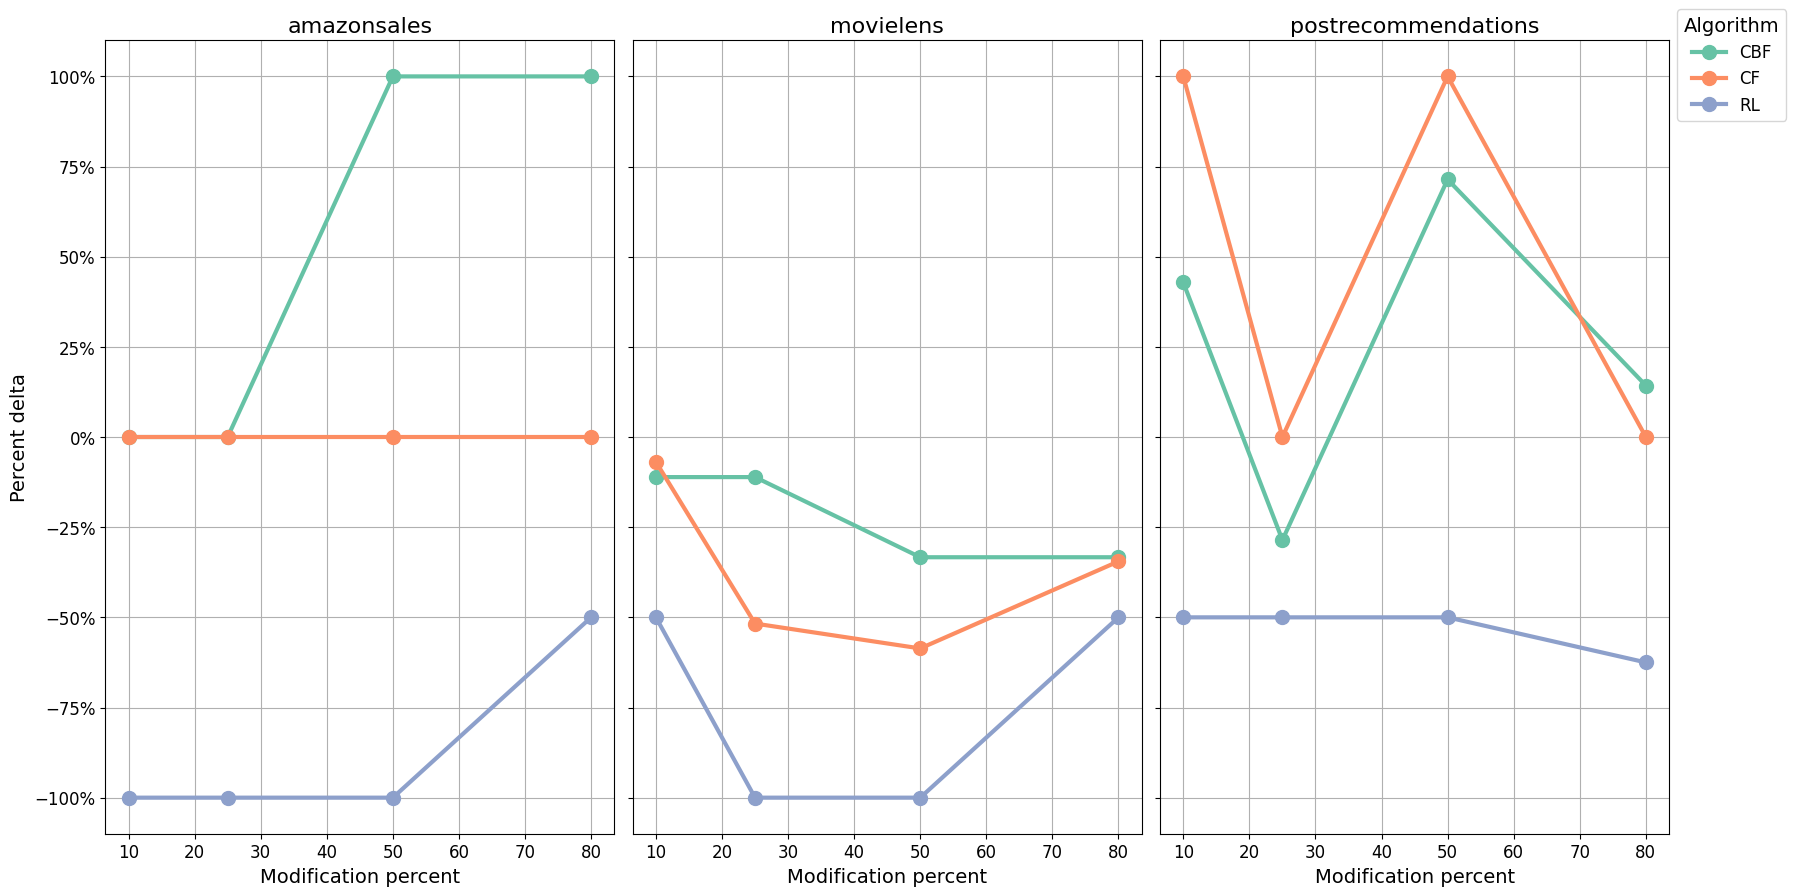

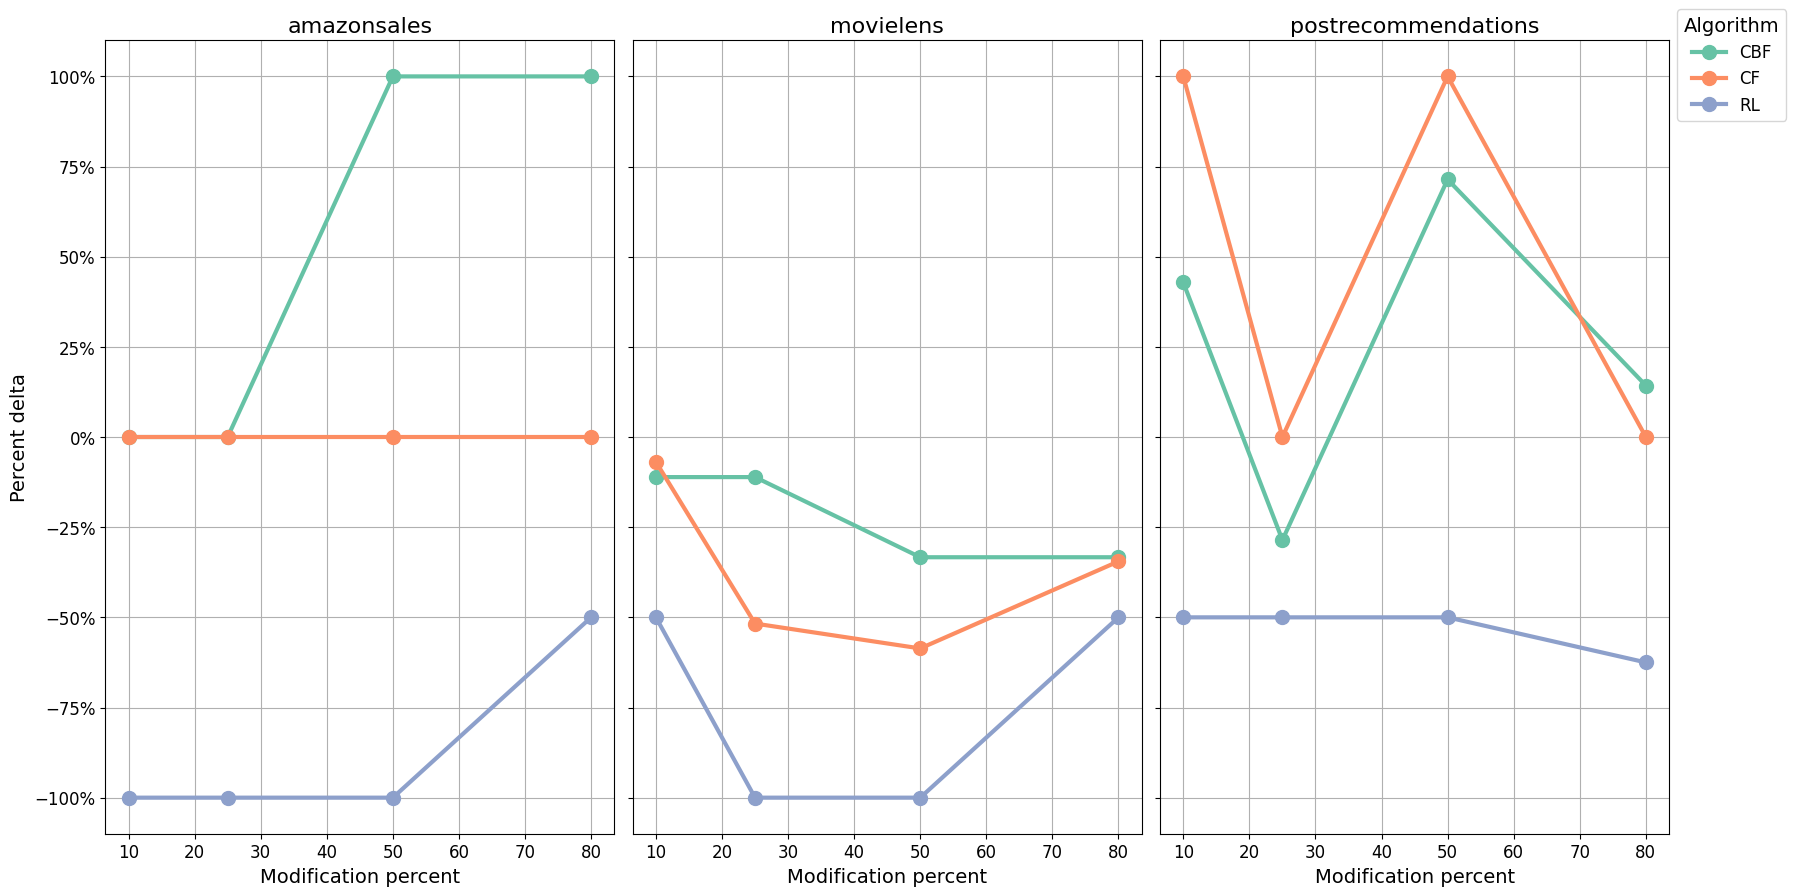

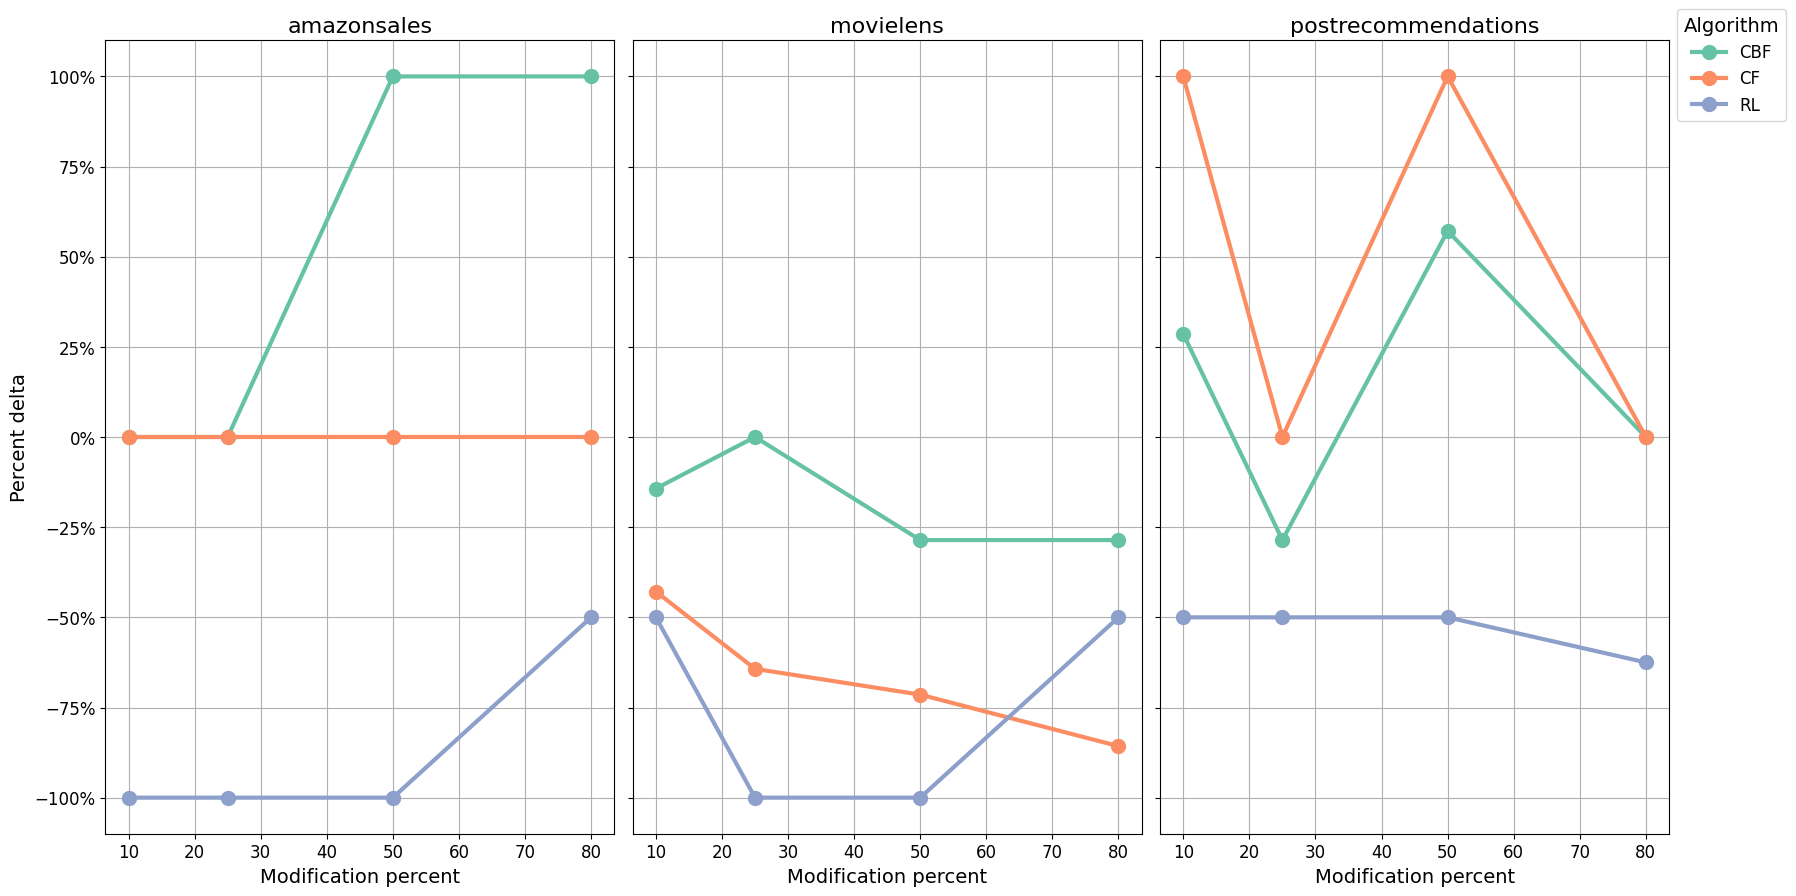

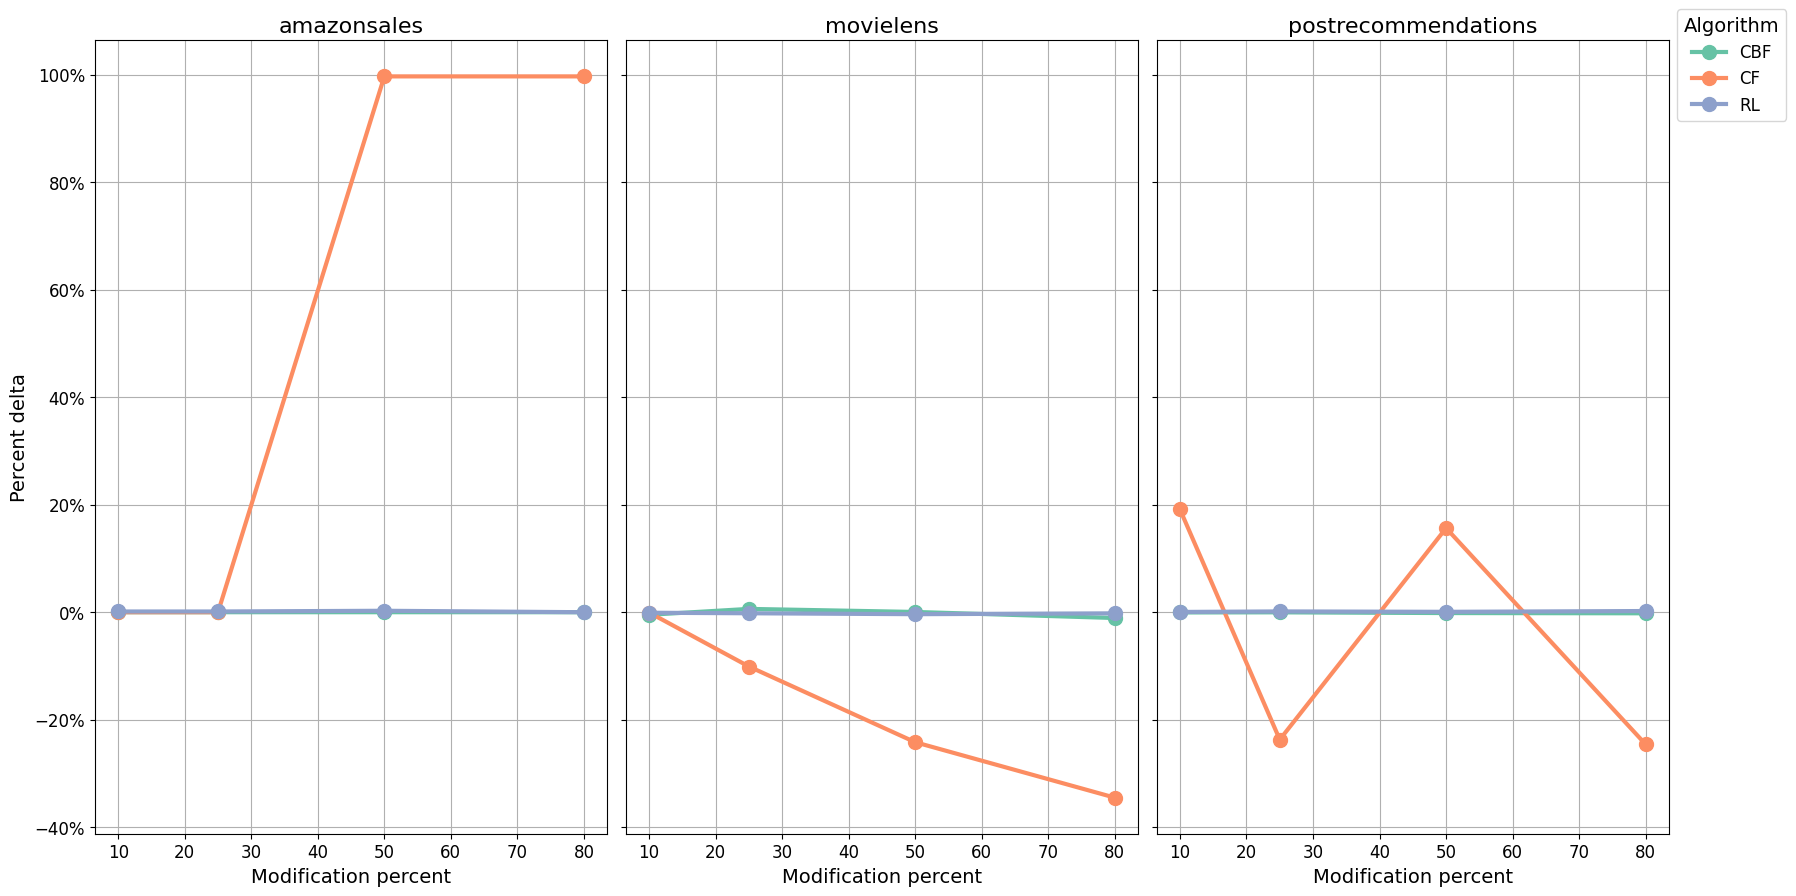

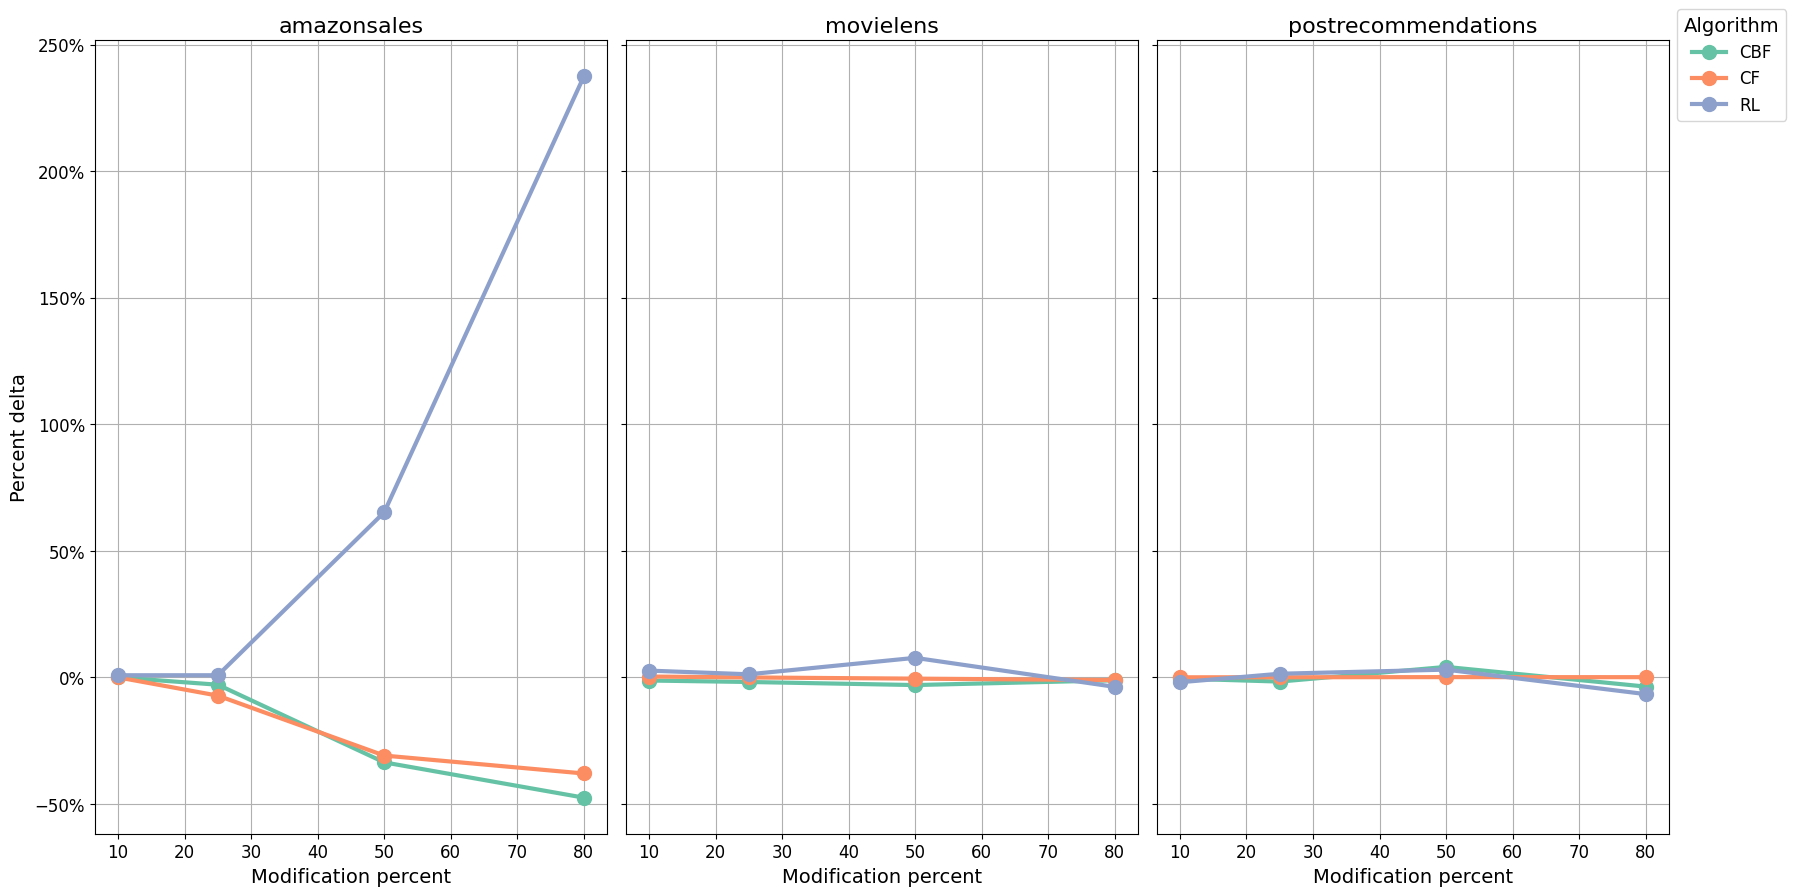

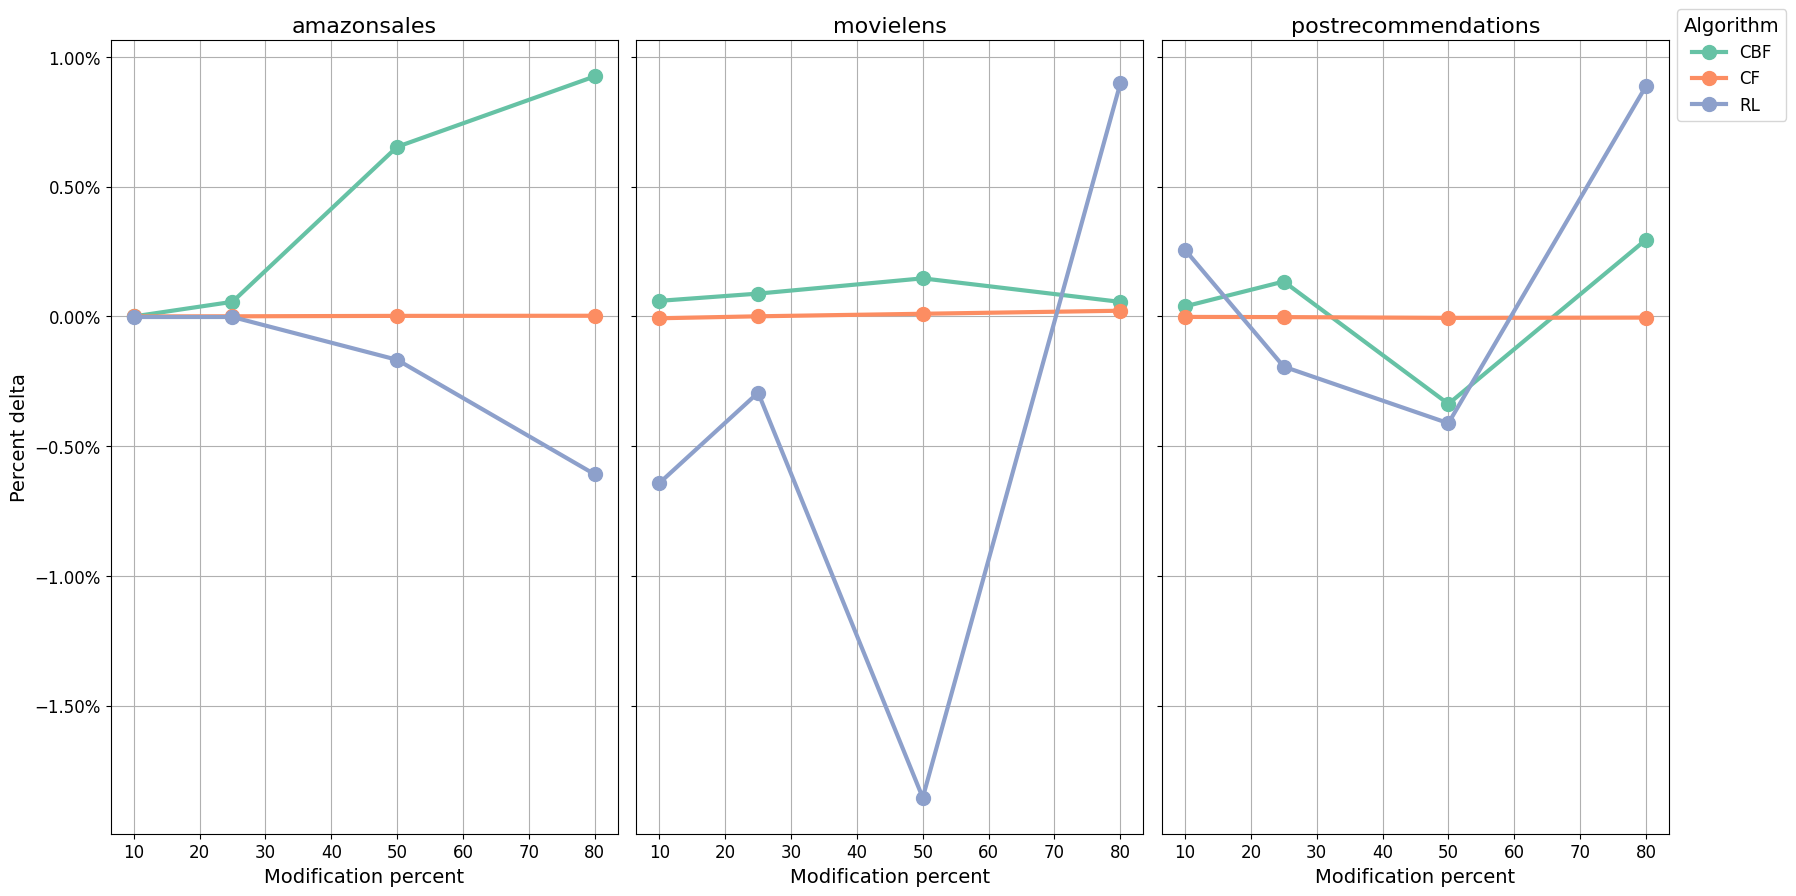

In [65]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns

df = specific_df.copy()
df['combo'] = df['algorithm'] + ' - ' + df['dataset']

algorithms = df['algorithm'].unique()
datasets = df['dataset'].unique()

# Paleta Set2 z Seaborn — kolory do legendy
palette = sns.color_palette("Set2", n_colors=len(algorithms))
algorithm_colors = dict(zip(algorithms, palette))

for key in df['key'].unique():
    key_subset = df[df['key'] == key]

    fig, axes = plt.subplots(1, 3, figsize=(18, 9), sharey=True)
    
    for i, dataset in enumerate(datasets):
        ax = axes[i]
        dataset_subset = key_subset[key_subset['dataset'] == dataset]

        for alg in algorithms:
            alg_subset = dataset_subset[dataset_subset['algorithm'] == alg]
            base_color = algorithm_colors[alg]

            ax.plot(
                alg_subset['percent'],
                alg_subset['percent_delta'],
                marker='o',
                label=alg,
                color=base_color,
                linewidth=3,
                markersize=10 
            )

        ax.set_title(f"{dataset}", fontsize=16)
        ax.set_xlabel("Modification percent", fontsize=14)
        ax.tick_params(axis='both', labelsize=12)
        ax.grid(True)
        ax.yaxis.set_major_formatter(PercentFormatter(1.0))
        if i == 0:
            ax.set_ylabel("Percent delta", fontsize=14)

    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(
        handles,
        labels,
        title="Algorithm",
        title_fontsize=14,
        fontsize=12,
        bbox_to_anchor=(0.93, 1),  # <-- przesunięcie bliżej wykresów
        loc='upper left'
    )

    plt.tight_layout()
    plt.subplots_adjust(right=0.93)  # <-- zmniejsza margines po prawej
    plt.savefig(f"{save_path}/{key}.png", dpi=300, bbox_inches='tight')
    plt.show()